In [1]:
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random


In [2]:
class Rect(object):
    
    """A `Rect` is defined by two opposite corners with x,y coordinates.
    Attributes
    ----------
    x1, y1 : float
        The coordinates of the bottom left front corner.
    x2, y2 : float
        The coordinates of the top right back corner.
    """
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        
        self.cx = 0.5 * ( x1 + x2 )
        self.cy = 0.5 * ( y1 + y2 )

        #list of x and list of y coordinates
        self.x= [self.x1, self.x1, self.x2, self.x2]
        self.y = [self.y1, self.y2, self.y2, self.y1]
    
    def move(self, _x, _y):
        
        newX = []
        newY = []
        
        for x,y in zip(self.x,self.y):
            
            x -= _x
            y -= _y
            
            newX.append(x)
            newY.append(y)
        
        self.x = newX
        self.y = newY
    
    def rotate(self, angle):
        
        s = math.sin(angle)
        c = math.cos(angle)
        
        newX = []
        newY = []
        
        for x,y in zip(self.x,self.y):
            #move point to origin
            x -= self.cx
            y -= self.cy
            
            #rotate point
            
            xnew = x * c - y * s
            ynew = x * s + y * c

            #move point back
            x = xnew + self.cx
            y = ynew + self.cy
            
            newX.append(x)
            newY.append(y)
        
        self.x = newX
        self.y = newY    
    
    def display(self, colorv):
        plt.axis("equal")
        plt.fill(self.x, self.y, c=colorv, linewidth=1)

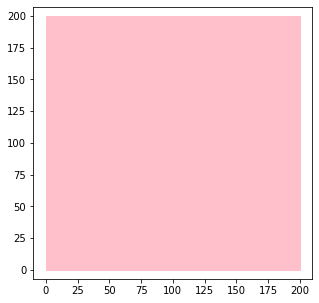

In [3]:
#figure size
plt.figure(figsize=(5,5))
#set limits of axis
plt.xlim(-50, 250)
plt.ylim(-50, 250)

r = Rect(0,0,200,200)
r.display("pink")

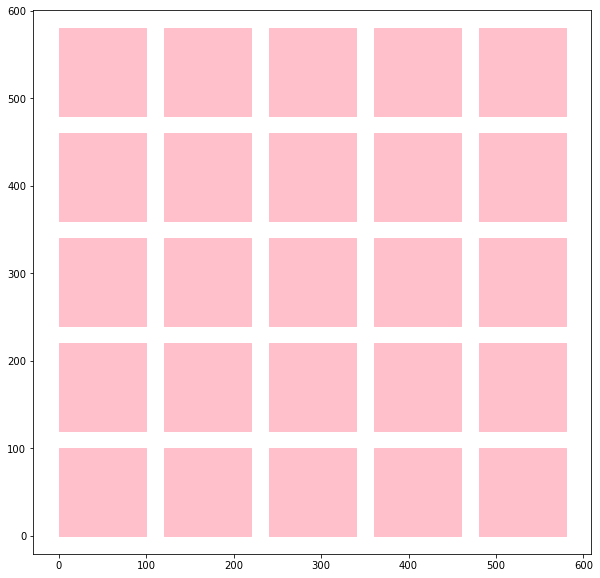

In [4]:
#figure size
plt.figure(figsize=(10,10))
#set limits of axis
plt.xlim(-50, 250)
plt.ylim(-50, 250)

rects = []
gap = 20

for x in range(5):
    for y in range(5):
        r = Rect(x*100 + x*gap, y*100+ y*gap, (x+1)*100+ x*gap, (y+1)*100+ y*gap )
        rects.append(r)
for rs in rects:
    rs.display("pink")

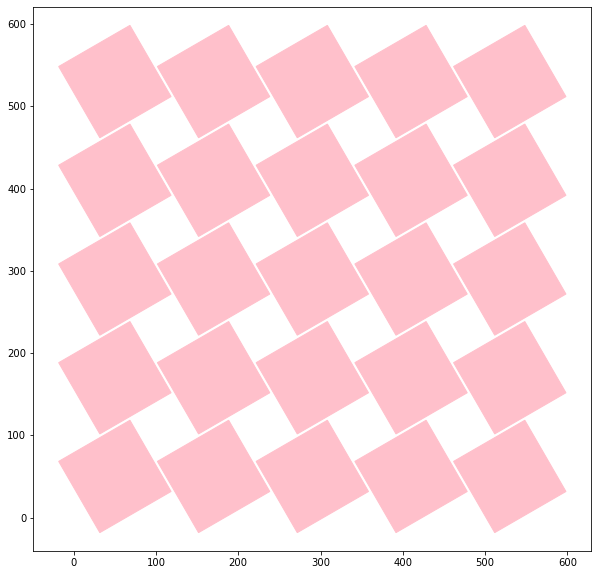

In [5]:
#figure size
plt.figure(figsize=(10,10))
#set limits of axis
plt.xlim(-50, 250)
plt.ylim(-50, 250)

rects = []
gap = 20

for x in range(5):
    for y in range(5):
        r = Rect(x*100 + x*gap, y*100+ y*gap, (x+1)*100+ x*gap, (y+1)*100+ y*gap )
        r.rotate(math.radians(30))
        rects.append(r)
for rs in rects:
    rs.display("pink")

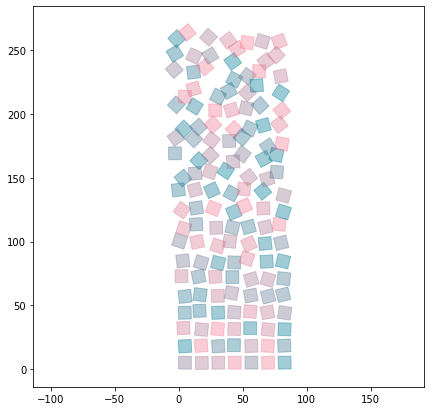

In [6]:
fig = plt.figure(figsize=(7, 7))

rects = []
gap = 3

for x in range(7):
    for y in range(20):
        
        r = Rect(x*10 + x*gap, y*10+ y*gap, (x+1)*10+ x*gap, (y+1)*10+ y*gap )
        
        degree = random.randint(-r.cy,r.cy) * 0.3 
        distance = random.randint(0,r.cy) * 0.05
        
        r.rotate( math.radians(0.75+degree))
        r.move(distance , -distance)
        rects.append(r)
        
for r in rects:
    ct = [random.random(), 0.5, 0.6, 0.4]
    r.display(ct)

In [7]:
@interact(iterations = widgets.IntSlider(min=0, max=15, step=1, value=5),
          line_width = widgets.IntSlider(min=1, max=20, step=1, value=5),
          my_seed = widgets.IntSlider(min=0, max=5000, step=1, value=150))

def rec(iterations, line_width, my_seed):
    
    random.seed(my_seed)
    
    line_width *=0.1
    x1 = 0
    y1 = 0

    x2 = 400
    y2 = 200

    rectangles = [ Rect(x1,y1,x2,y2) ]

    for i in range(iterations):

        new_rectangles = []

        #split every existing rectangle either vertically or horizontally
        for rect in rectangles:

            #random.random returns a random number in the range [0.0, 1.0)
            doSplit = random.random()

            #split is a ratio ranging from 0.4 to 0.9
            split = random.random()*0.2+0.4

            if doSplit > 0.5:
                
                #split them horizontally
                sy = (rect.y2 - rect.y1) * split + rect.y1
                new_rectangles.append( Rect(rect.x1, rect.y1, rect.x2, sy))
                new_rectangles.append( Rect(rect.x1, sy, rect.x2, rect.y2))
            else:
                #split them vertically
                sx = (rect.x2 - rect.x1) * split + rect.x1
                new_rectangles.append( Rect(rect.x1, rect.y1, sx, rect.y2))
                new_rectangles.append( Rect(sx, rect.y1, rect.x2, rect.y2))

        #overwrite the rectangles with the new rectangles
        rectangles = new_rectangles

    #display
    
    #set size of figure
    plt.figure(figsize=(10,10))
    #set limits of axis
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)

    for rect in rectangles:
        
        plt.plot(rect.x, rect.y, color='lightcoral', linewidth= line_width)
        col = [random.random(), 0.5, 0.6, 0.4]
        plt.fill(rect.x, rect.y, c = col, linewidth=1)
    
    plt.show()

    

    

interactive(children=(IntSlider(value=5, description='iterations', max=15), IntSlider(value=5, description='li…

# conda install -c conda-forge ffmpeg

In [8]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

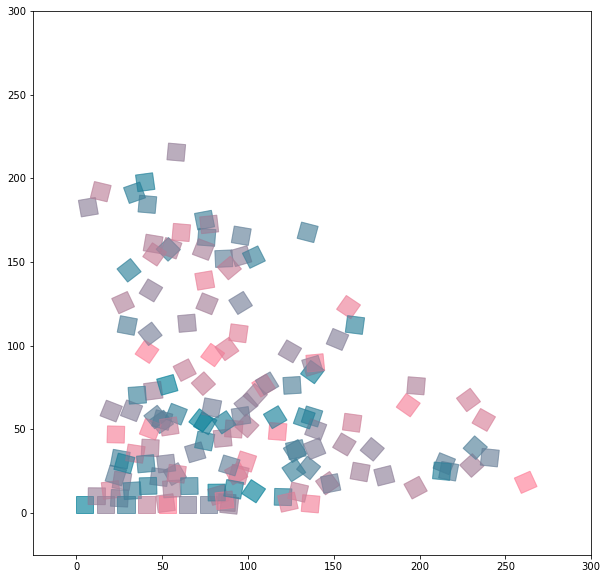

In [9]:
import matplotlib
from matplotlib import pyplot
from matplotlib import animation
import math

rect_count = 7*20
time = 100
gap = 2

#instanciate rectangles

geometries = []

for x in range(7):
    for y in range(20):
        
        ct = [random.random(), 0.5, 0.6, 0.4]
        r =  pyplot.Rectangle( (x*10 + x*gap, y*10+ y*gap) , 10, 10, color = ct )
        geometries.append(r)

# we create a 500x(7*3) array to store 500 different positions for each element of our list
data = np.zeros((time,rect_count*3))

# we populate the array with data
for i,rectangle in enumerate(geometries):
    
    degree = math.radians(random.randint(-rectangle.xy[1],rectangle.xy[1]) * 0.3)
    distance = random.randint(0,rectangle.xy[1]) * 0.01
    
    data[:,3*i] = [ rectangle.xy[0] + distance * k for k in range(time)]
    data[:,3*i+1] = [ rectangle.xy[1] - distance * k for k in range(time)]
    data[:,3*i+2] = [ degree * k for k in range(time)]

# create a plot
fig = plt.figure(figsize=(10, 10))

plt.axis('equal')
ax = pyplot.axes( xlim=(-25, 300), ylim=(-25, 300))



def init():
    
    
    for geo in geometries:
        ax.add_patch(geo)
        
    return geometries

def animate(i):
    # for state in data:
    for idx in range(rect_count):
        geometries[idx].xy = (data[i,idx*3],data[i,idx*3+1])
        geometries[idx].angle = data[i,idx*3+2]
 
    return geometries

anim2=animation.FuncAnimation(fig,animate,init_func=init,frames=100,blit=True)

Writer = animation.writers['pillow']
writer = Writer( metadata=dict(artist='Me'), bitrate=1800)

HTML(anim2.to_html5_video())